# NBAPositionify: Leveraging Data Mining Techniques to Classify Professional Basketball Players into Positions

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Get Dataset from Kaggle
# Requires the kaggle package to download dataset. Uncomment the line below to install
# !pip3 install kaggle
import kaggle
# Requires kaggle.json (Kaggle API Key) placed in ~/.kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("drgilermo/nba-players-stats", path="./data/", unzip=True)

## Exploratory Data Analysis

Our data is from `basketball-reference.com`. Three datasets:

In [3]:
player_data = pd.read_csv("./data/player_data.csv")
player_data.head(1)


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University


In [4]:
players = pd.read_csv("./data/Players.csv")
players.head(1)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN


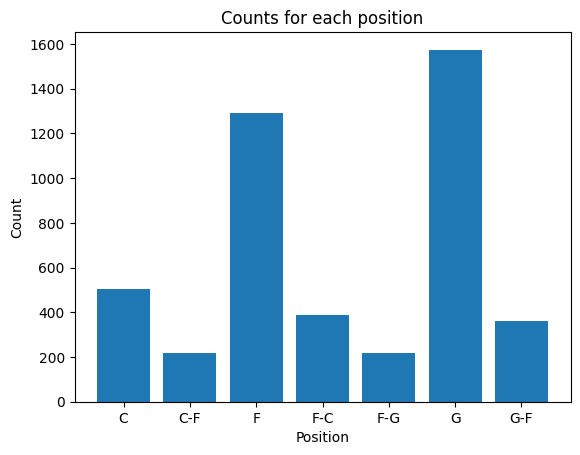

In [5]:
plt.bar(player_data.groupby('position').size().index, player_data.groupby('position').size().values)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Counts for each position')
plt.show()

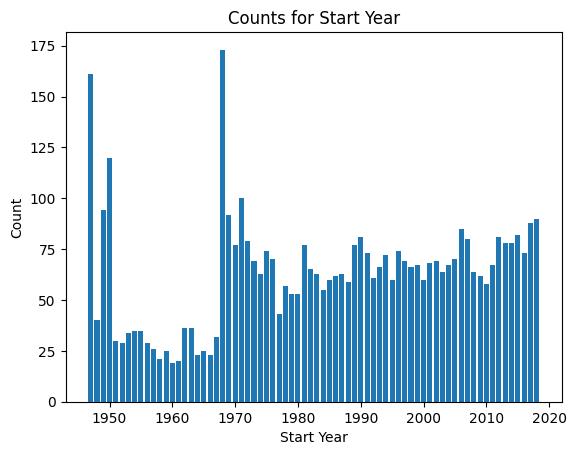

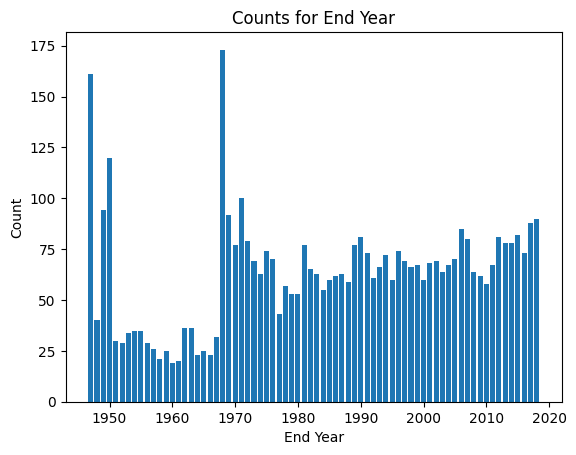

In [6]:
plt.bar(player_data.groupby('year_start').size().index, player_data.groupby('year_start').size().values)
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.title('Counts for Start Year')
plt.show()

plt.bar(player_data.groupby('year_start').size().index, player_data.groupby('year_start').size().values)
plt.xlabel('End Year')
plt.ylabel('Count')
plt.title('Counts for End Year')
plt.show()

In [7]:
stats = pd.read_csv("season_stats_preprocessed.csv")

# Clustering

## Data Normalization

In [8]:
def normalize_data(data):
    return (data-data.mean())/data.std()

## KMeans Clustering

In [9]:
from sklearn.cluster import KMeans

def kmeans(n_clusters, normalize=False, columns=["height_inches", "AST%", "weight", "TRB%"]):
    kmeans_stats = stats[columns]
    if normalize:
        kmeans_stats = normalize_data(kmeans_stats)
    model = KMeans(n_clusters=n_clusters)
    model.fit(kmeans_stats)

    kmeans_stats["cluster"] = model.labels_
    kmeans_stats.insert(0, "Pos", stats["Pos"])
    return kmeans_stats

## Agglomerative Clustering (Hierarchical Approach)

In [10]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative(n_clusters, normalize=False, columns=["height_inches", "AST%", "weight", "TRB%"]):
    agglomerative_stats = stats[columns]
    if normalize:
        agglomerative_stats = normalize_data(agglomerative_stats)
    model = KMeans(n_clusters=n_clusters)
    model.fit(agglomerative_stats)

    agglomerative_stats["cluster"] = model.labels_
    agglomerative_stats.insert(0, "Pos", stats["Pos"])
    return agglomerative_stats

## Visualization Generators

In [11]:
def bar_chart_clusters(data, n_clusters):
    for cluster in range(n_clusters):
        cur = data.loc[data["cluster"] == cluster]
        plt.bar(cur.groupby('Pos').size().index, cur.groupby('Pos').size().values)
        plt.xlabel('Position')
        plt.ylabel('Count')
        plt.title(f'Counts for each position in cluster {cluster}')
        plt.show()

In [12]:
def pie_chart_clusters(data, n_clusters):
    for cluster in range(n_clusters):
        cur = data.loc[data["cluster"] == cluster]
        position_percentages = (cur['Pos'].value_counts() / len(cur)).sort_values(ascending=False)
        plt.pie(cur['Pos'].value_counts())
        plt.title(f"Distribution of players by position in cluster {cluster}")
        plt.axis("equal")
        legend_labels = [f"{position}: {round(percentage, 3)}%" for position, percentage in zip(position_percentages.index, position_percentages.values)]
        plt.legend(legend_labels, loc="best")
        plt.show()

In [13]:
def scatter_plot_clusters(data, n_clusters, x, y):
    cluster_colors = ['red', 'orange', 'green', 'blue', 'purple']
    for cluster in range(n_clusters):
        cluster_data = data.loc[data["cluster"] == cluster]
        cluster_data = stats.loc[cluster_data.index.values]
        plt.scatter(cluster_data[x], cluster_data[y], color=cluster_colors[cluster], label=f'Cluster {cluster}', alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Cluster Analysis based on {x} and {y}')
    plt.legend()
    plt.grid(True)
    plt.show()

### KMeans with 5 Clusters and No Normalization

/var/folders/9s/d7bjfqcd4cd4xv6wc7kw8by40000gn/T/ipykernel_16660/3147651020.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_stats["cluster"] = model.labels_


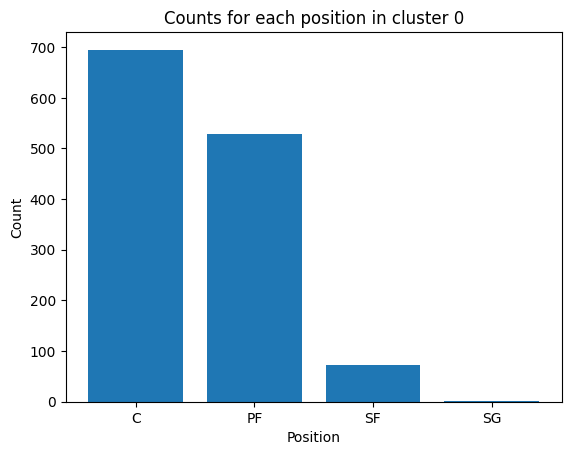

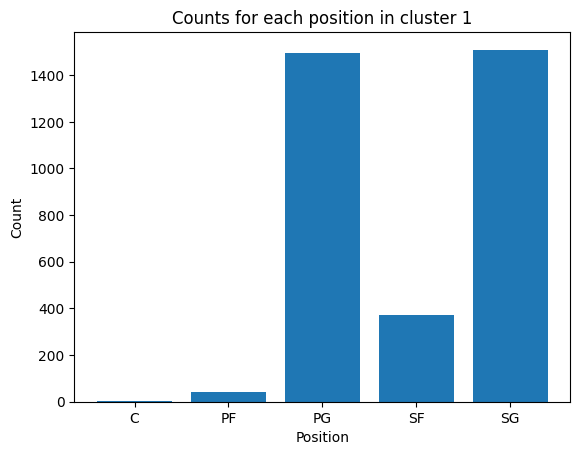

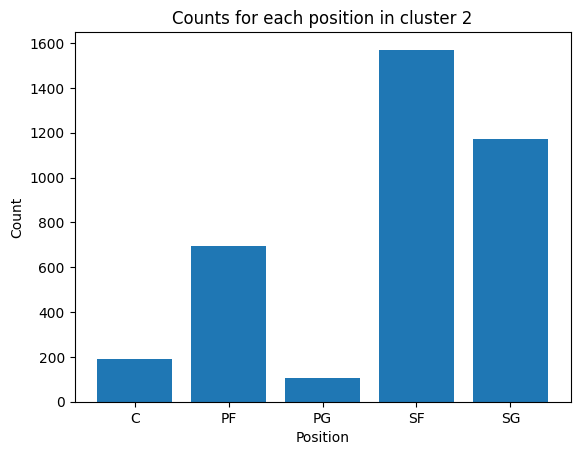

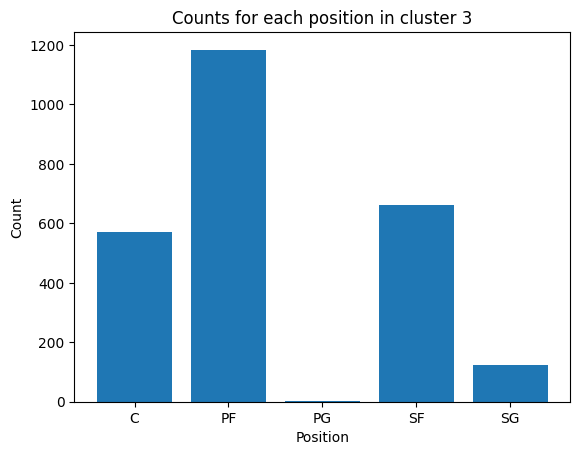

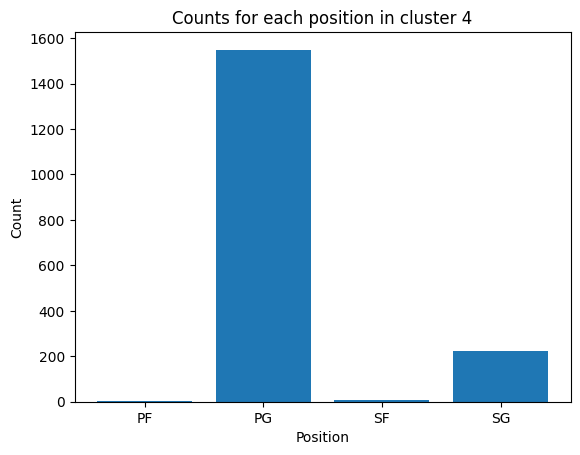

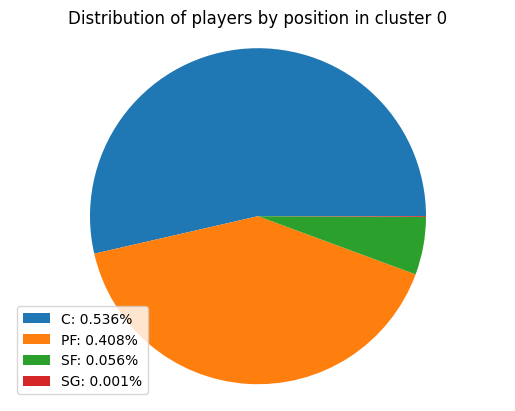

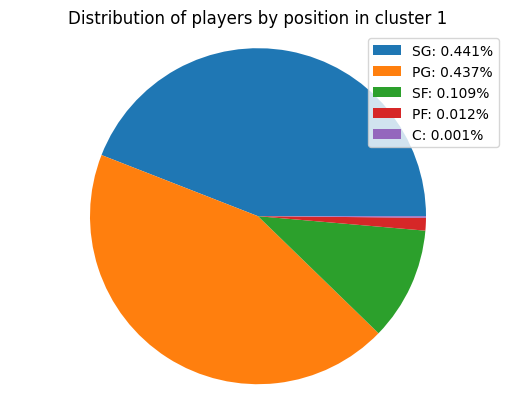

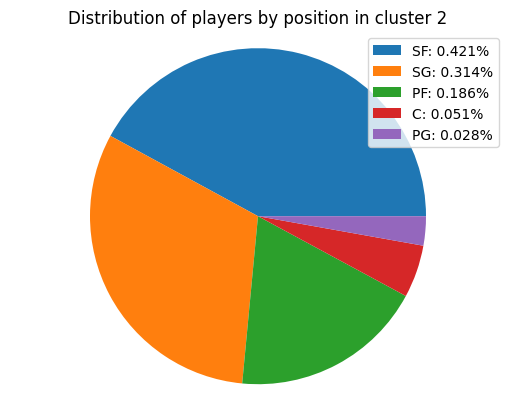

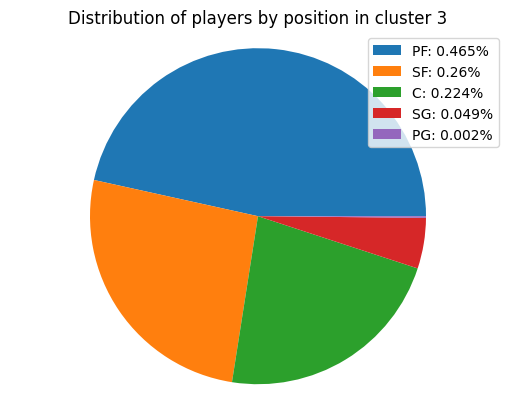

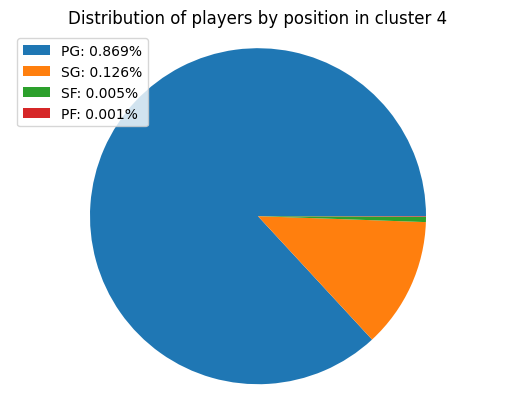

In [14]:
kmeans_stats_5 = kmeans(5)
bar_chart_clusters(kmeans_stats_5, 5)
pie_chart_clusters(kmeans_stats_5, 5)

### KMeans with 5 Cluster and Normalization

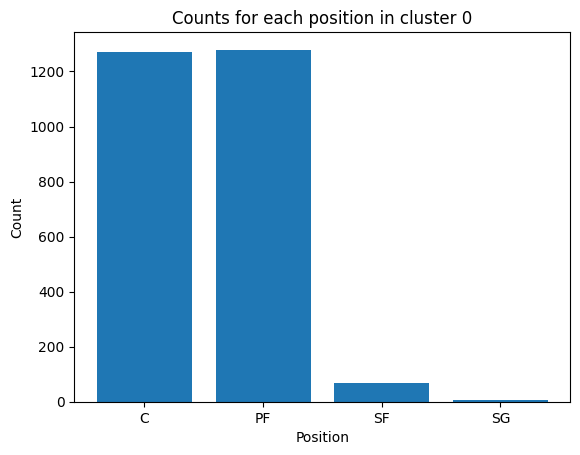

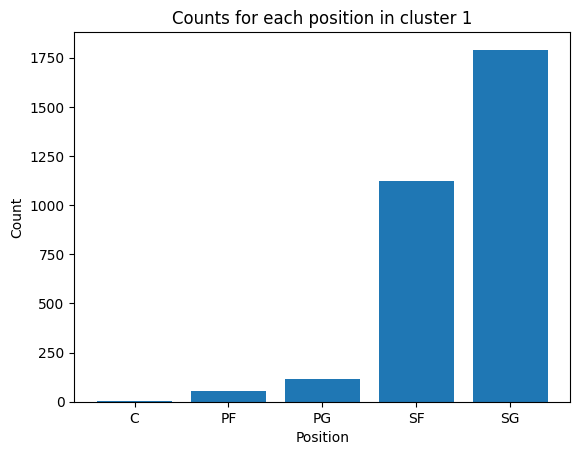

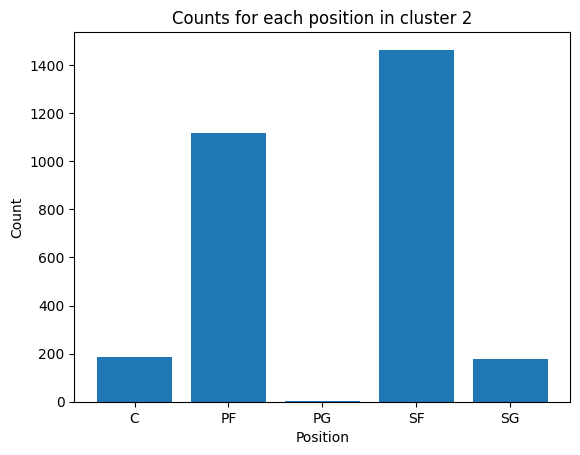

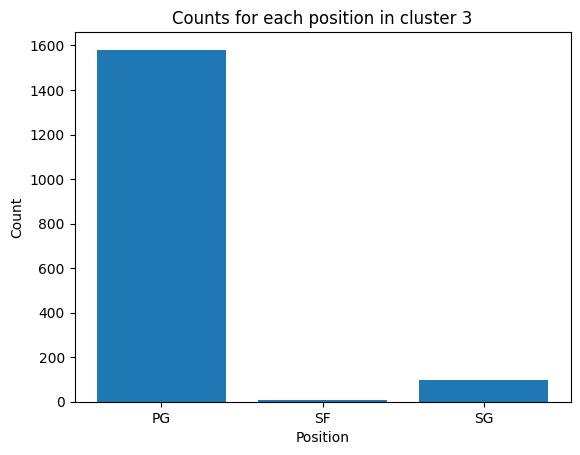

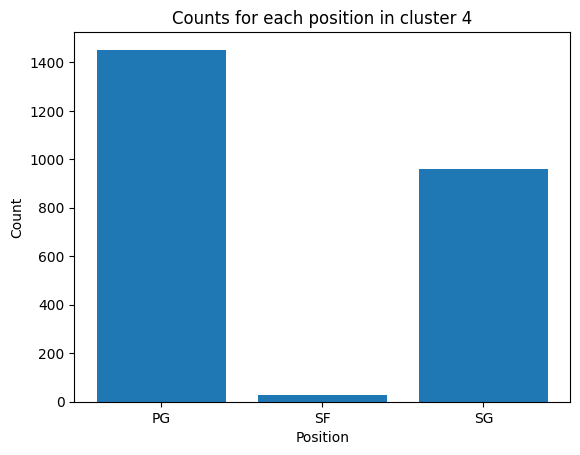

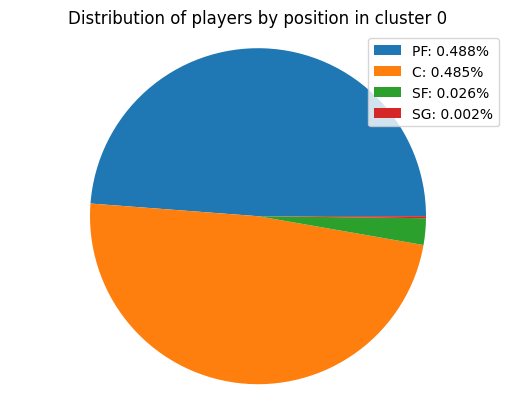

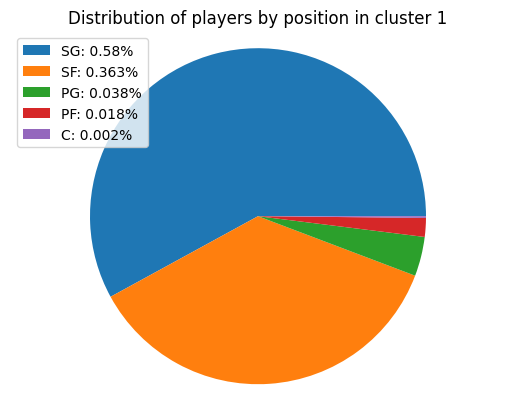

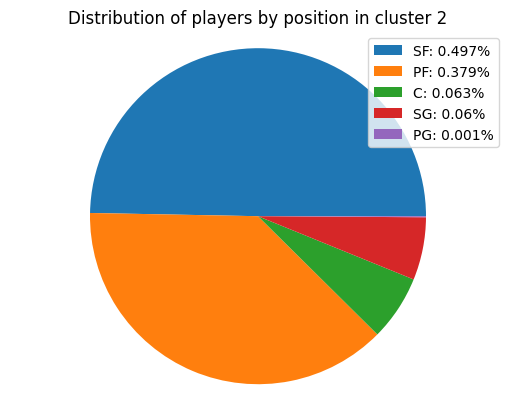

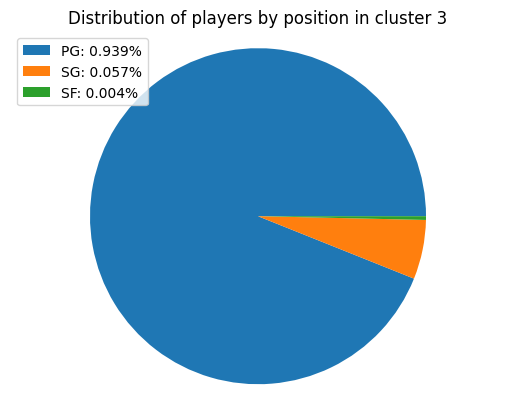

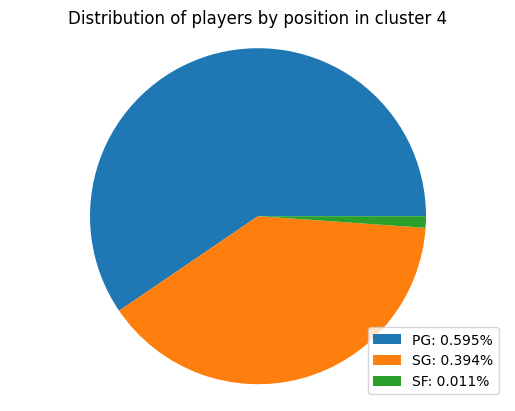

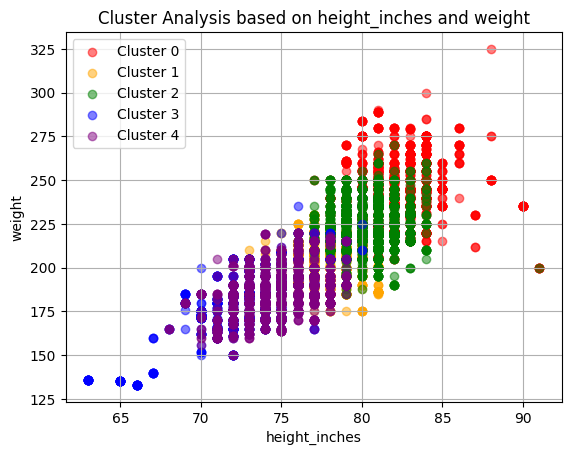

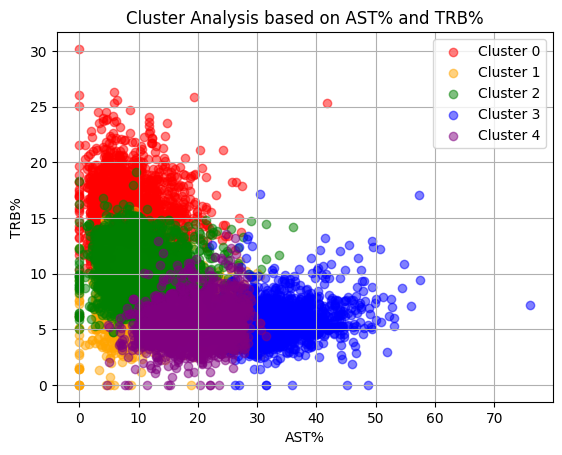

In [15]:
kmeans_stats_norm_5 = kmeans(5, True)
bar_chart_clusters(kmeans_stats_norm_5, 5)
pie_chart_clusters(kmeans_stats_norm_5, 5)
scatter_plot_clusters(kmeans_stats_norm_5, 5, 'height_inches', 'weight')
scatter_plot_clusters(kmeans_stats_norm_5, 5, 'AST%', 'TRB%')

### KMeans with 2 Clusters and Normalization

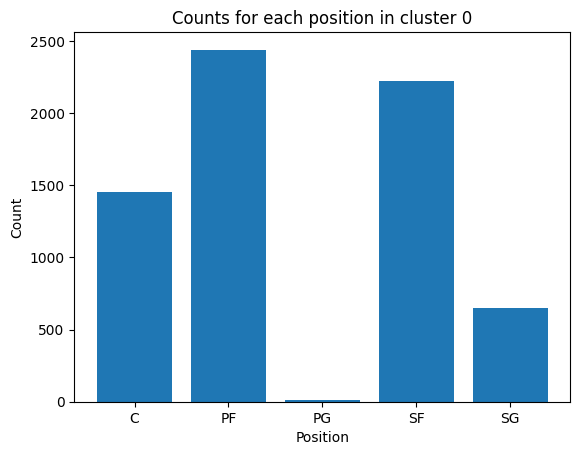

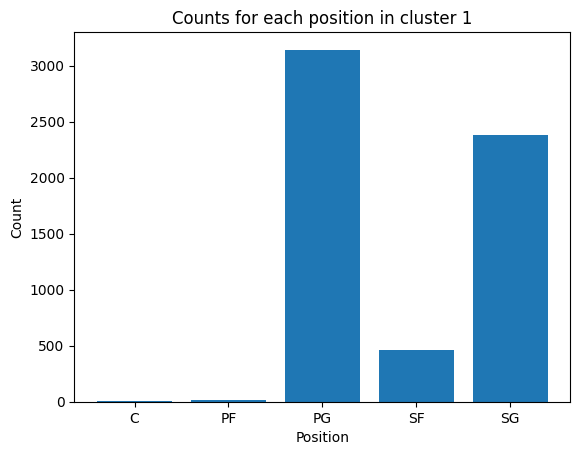

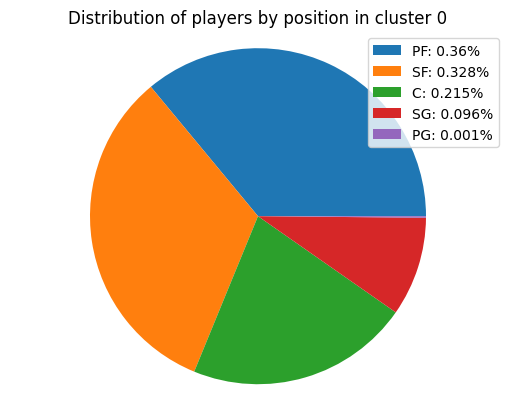

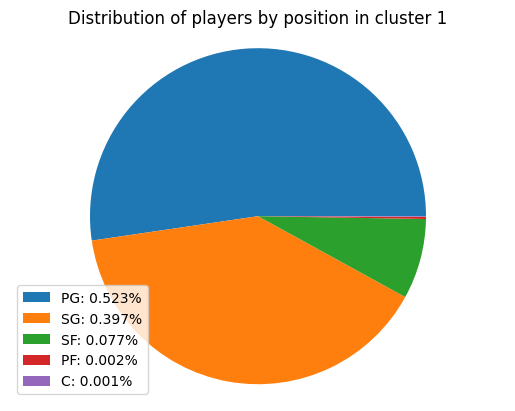

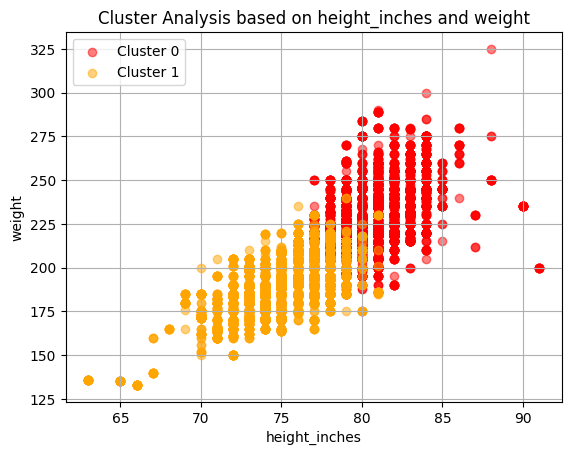

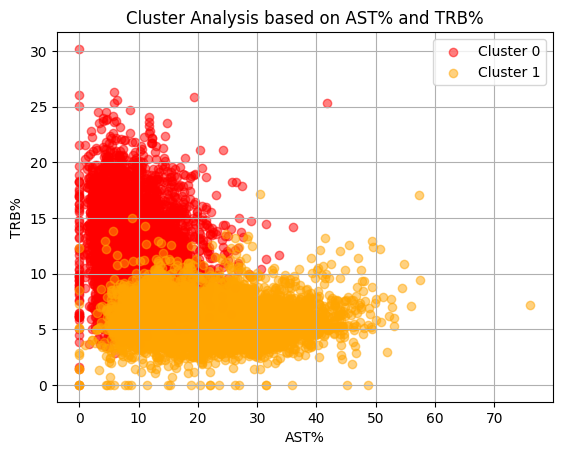

In [16]:
kmeans_stats_norm_2 = kmeans(2, True)
bar_chart_clusters(kmeans_stats_norm_2, 2)
pie_chart_clusters(kmeans_stats_norm_2, 2)
scatter_plot_clusters(kmeans_stats_norm_2, 2, 'height_inches', 'weight')
scatter_plot_clusters(kmeans_stats_norm_2, 2, 'AST%', 'TRB%')

### Agglomerative with 5 Clusters and Normalization

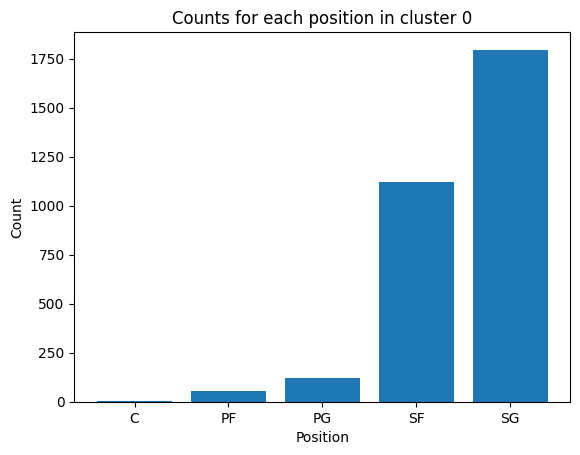

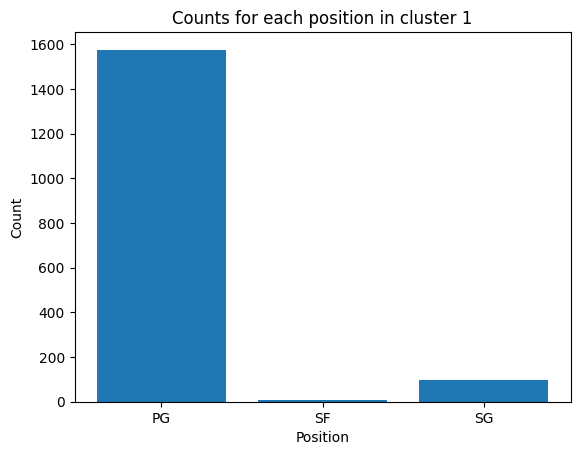

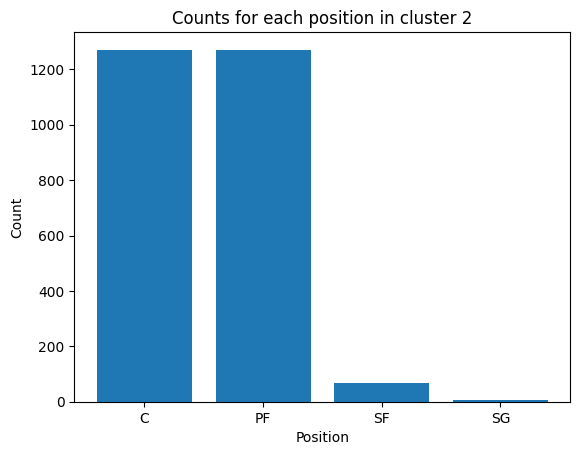

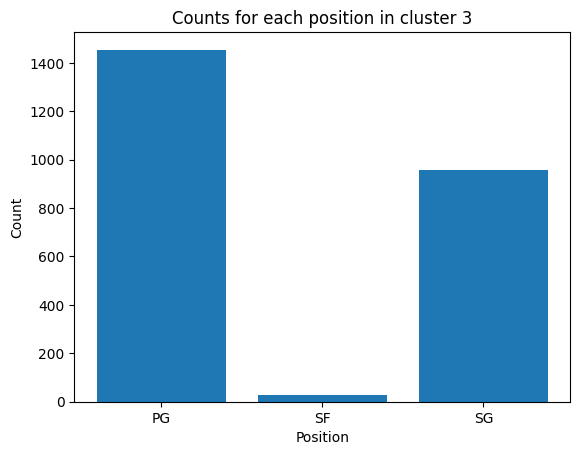

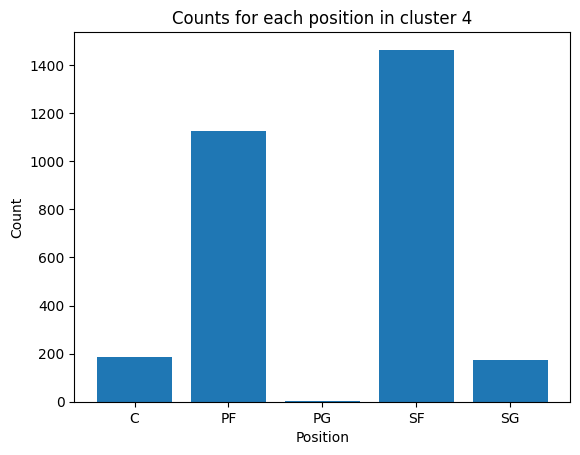

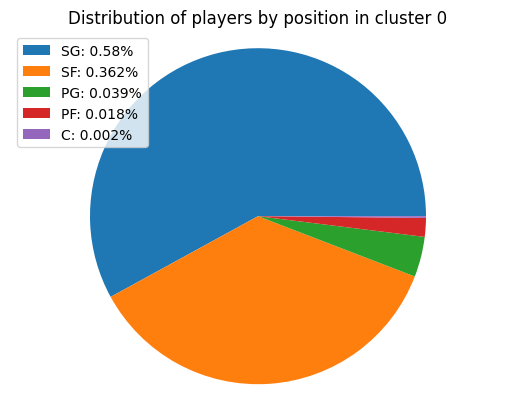

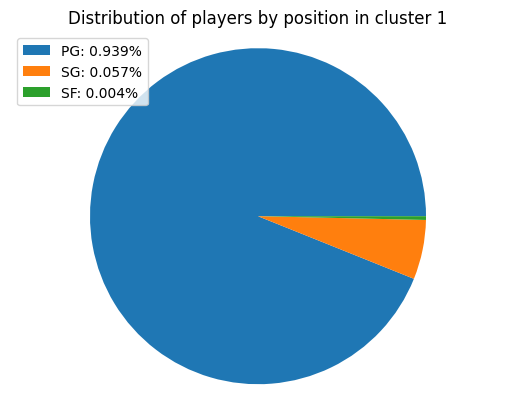

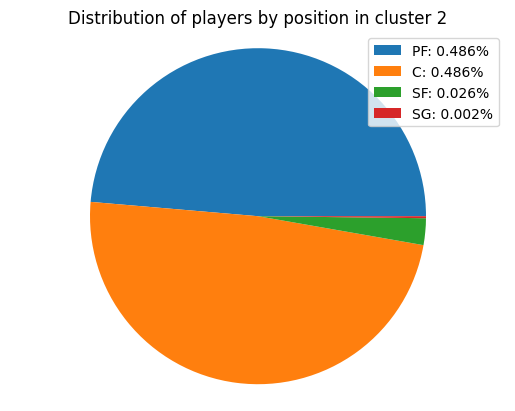

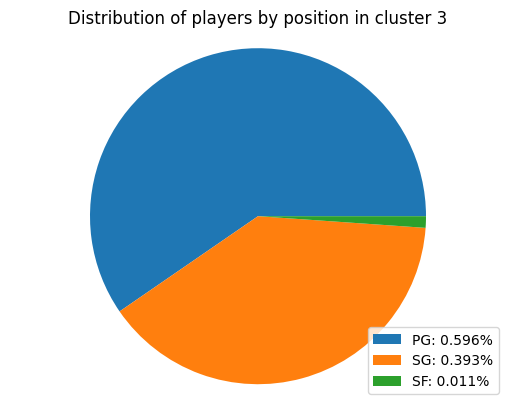

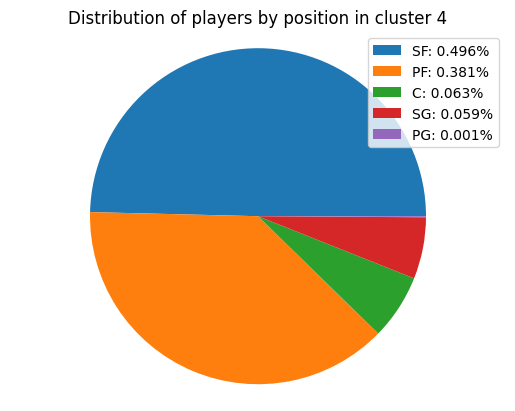

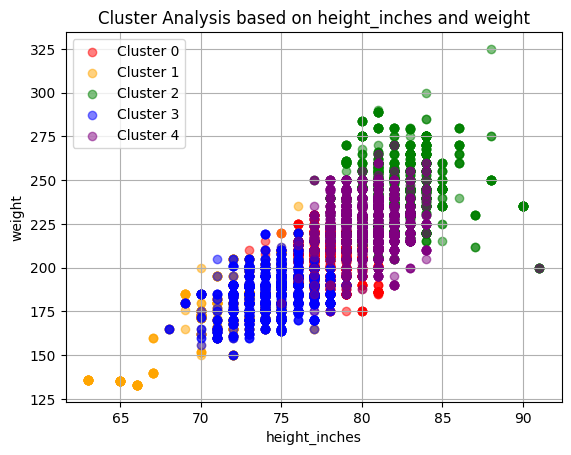

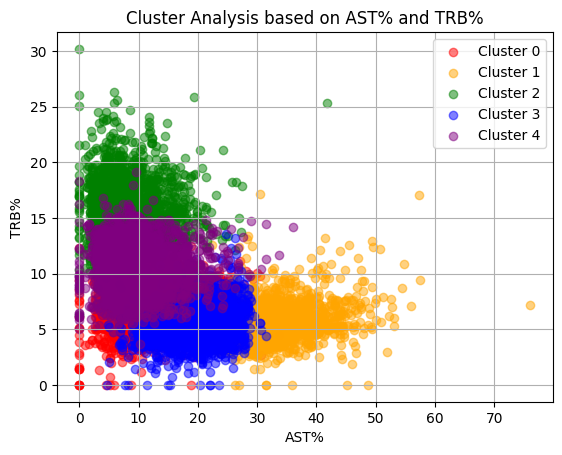

In [17]:
agglomerative_stats_norm_5 = kmeans(5, True)
bar_chart_clusters(agglomerative_stats_norm_5, 5)
pie_chart_clusters(agglomerative_stats_norm_5, 5)
scatter_plot_clusters(agglomerative_stats_norm_5, 5, 'height_inches', 'weight')
scatter_plot_clusters(agglomerative_stats_norm_5, 5, 'AST%', 'TRB%')

### Agglomerative with 3 Clusters and Normalization

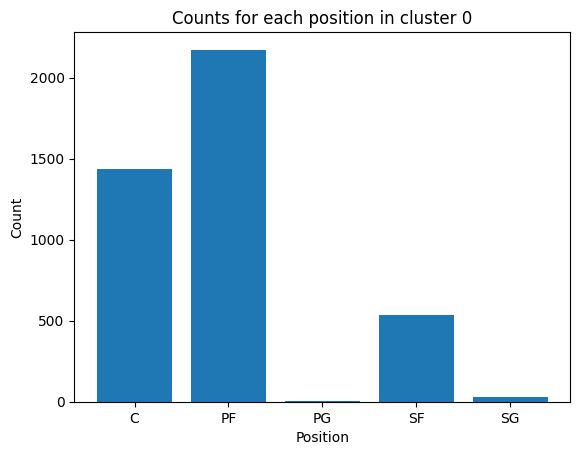

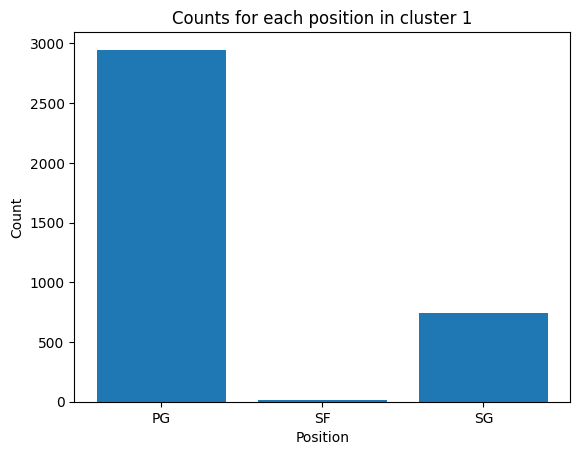

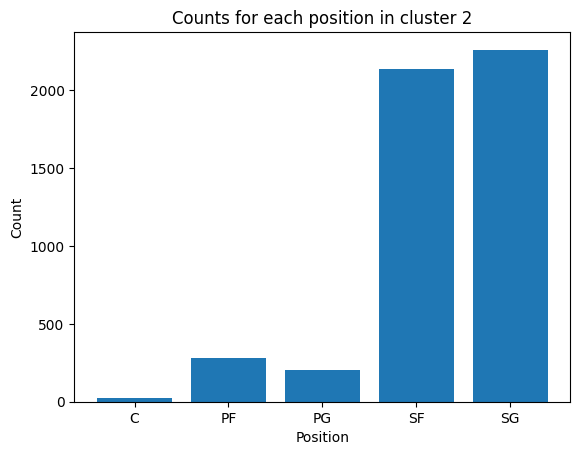

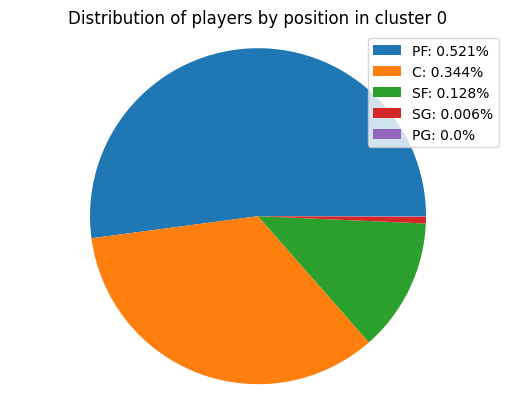

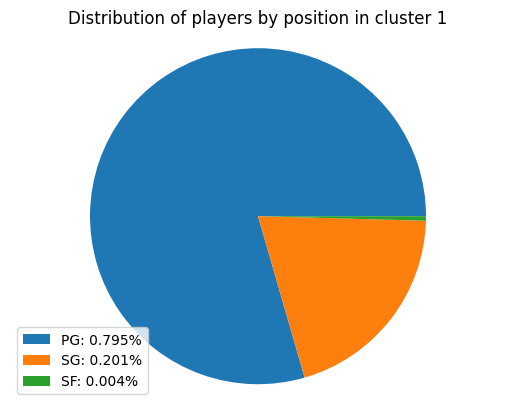

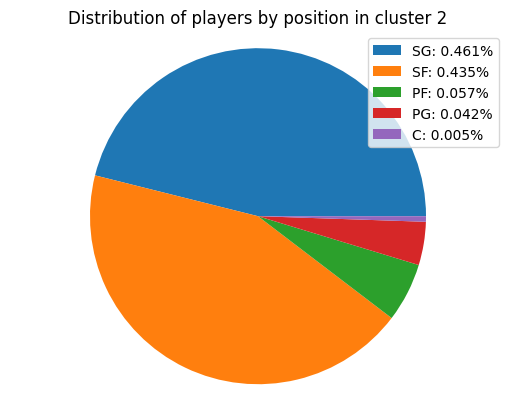

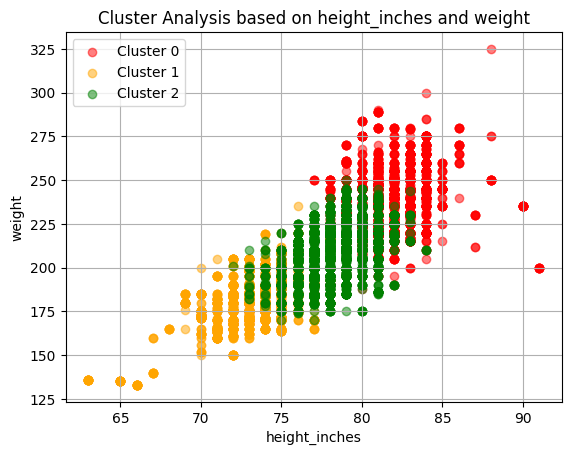

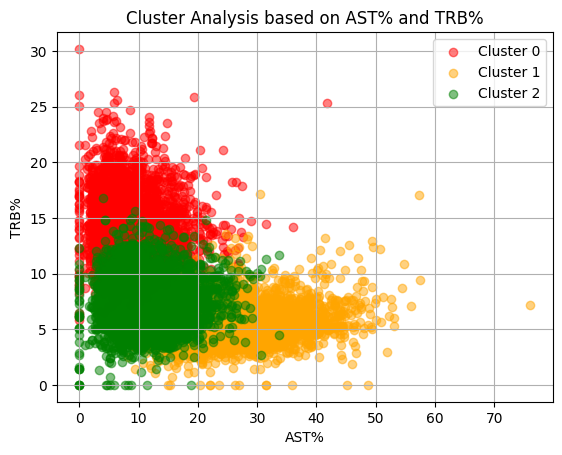

In [18]:
agglomerative_stats_norm_3 = kmeans(3, True)
bar_chart_clusters(agglomerative_stats_norm_3, 3)
pie_chart_clusters(agglomerative_stats_norm_3, 3)
scatter_plot_clusters(agglomerative_stats_norm_3, 3, 'height_inches', 'weight')
scatter_plot_clusters(agglomerative_stats_norm_3, 3, 'AST%', 'TRB%')

# Outlier Analysis - From Clustering

Visual observation of the counts from clusters 1 and 2 shows that cluster 1 contains mostly backcourt players - those playing center or power forward. Similarly, cluster 2 conatins mostly frontcourt players - those playing point guard and shooting guard. As a result, we'll inspect the player info of the rows in those clusters which do not fit within those groups and therefore can be classified as "outliers" in a sense.

In [19]:
# cluster_1 = agglomerative_stats_3.loc[agglomerative_stats_3["cluster"] == 1]
# cluster_1.head()
# cluster_1_pf_outliers = cluster_1.loc[cluster_1["Pos"] == "PF"]
# cluster_1_c_outliers = cluster_1.loc[cluster_1["Pos"] == "C"]
# cluster_1_outliers = pd.concat([cluster_1_pf_outliers, cluster_1_c_outliers], axis=0)
# stats.loc[cluster_1_outliers.index.values]

In [20]:
# cluster_2 = agglomerative_stats_3.loc[agglomerative_stats_3["cluster"] == 2]
# cluster_2.head()
# cluster_2_pg_outliers = cluster_2.loc[cluster_2["Pos"] == "PG"]
# cluster_2_sg_outliers = cluster_2.loc[cluster_2["Pos"] == "SG"]
# cluster_2_outliers = pd.concat([cluster_2_pg_outliers, cluster_2_sg_outliers], axis=0)
# stats.loc[cluster_2_outliers.index.values]

# Outlier Detection - iForest Approach

_add description of iForest approach for outlier detection here_

In [21]:
# from sklearn.ensemble import IsolationForest

# def iForest(data, n_estimators=100, outlier_fraction='auto'):
#     isolation_forest = IsolationForest(n_estimators=n_estimators, contamination=outlier_fraction)
#     # Fit the model to the data
#     isolation_forest.fit(data)
#     # Use the model to predict the outliers
#     outliers = isolation_forest.predict(data) == -1
#     # Extract the rows with outliers
#     outliers_only = data[outliers]
#     # Extract the rows without outliers
#     no_outliers =data[~outliers]
#     return outliers_only, no_outliers

# for cluster in range(3):
#     cur_df = agglomerative_stats_3.loc[agglomerative_stats_3["cluster"] == cluster]
#     # print(cur_df[["height_inches", "AST%", "weight", "TRB%"]].head())
#     outliers = iForest(cur_df[["height_inches", "AST%", "weight", "TRB%"]])
#     print(outliers)